# Extracting Stock Data

Tracking what we learned in the IBM Data Science Professional Certificate we will use the yfinance library (yahoo) to extract data for stocks returning data in a pandas dataframe.

In [1]:
#!pip install -U yfinance pandas
!pip install yfinance==0.1.67
#some tickers give errors with newer versions of Panda
!pip install pandas==1.3.5
#!pip install -U yfinance pandas

#import the libraries
import yfinance as yf
import pandas as pd

# Using the yfinance Library to Extract Stock Data
Using the Ticker module we can create an object that will allow us to access functions to extract data and using the attribute info we can extract all the necessary information.

The format that the data is returned in is a Pandas DataFrame. With the Date as the index the share Open, High, Low, Close, Volume, and Stock Splits are given for each day.

We can reset the index of the DataFrame with the reset_index function. We also set the inplace paramter to True so the change takes place to the DataFrame itself.

exemple: 
- apple = yf.Ticker("AAPL")
- apple_info=apple.info
- apple_share_price_data = apple.history(period="max") #The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.
- apple_share_price_data.reset_index(inplace=True)#reset_index function
- apple_share_price_data.plot(x="Date", y="Open") #plot de Open Price
- apple.dividends #Access dividens data
- apple.dividends.plot() #plot the dividens

In [2]:
#Global variables
tickerName = None #Ticker of the stock to analyze
ticker = None #yfinance object
tickerInfo = None #JSON with fundamental info of the stock
ticker_share_price_data = None #table with Date VS Open, High, Low, Close, Volume, and Stock Splits

In [5]:
def getTickerYInfo (tickerName):
    """
    Based on the ticker we send it returns the yfinance object that will allow us to access functions to extract data
    """
    tickerloc = yf.Ticker(tickerName)
    return tickerloc

def getSharePriceData (tickerLoc, periodLoc):
    """
    Based on the ticker we send it returns the share price of the stock over a certain period of time.
    The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.
    """
    ticker_share_price_dataloc = tickerLoc.history(period=periodLoc)
    return ticker_share_price_dataloc

def plotShare(ticker_share_price_dataLoc, typeLoc):
    """
    Plot based on the DataFrame Date VS type, valid types are Open, High, Low, Close, Volume, and Stock Splits
    """
    ticker_share_price_dataLoc.reset_index(inplace=True)
    ticker_share_price_dataLoc.plot(x="Date", y=typeLoc)

flag = True
while(flag):
    try:
        tickerName = input('Please, enter the ticker of the company that you want to analyze\n')
        ticker = getTickerYInfo(tickerName)
        tickerInfo = ticker.info
        #Indices like SP500 or Nasdaq100 don't have "long name" atribute and throw error, we solved it asking for a short name
        print(f"ticker found for {tickerInfo['longName']}")
        flag = False
    except:
        try:
            print(f"ticker found for {tickerInfo['shortName']}")
            flag = False
        except:
            print(f"Cannot get info of {ticker}, it probably does not exist, please insert a valid ticker")

Please, enter the ticker of the company that you want to analyze
sgssdgsdgs
Cannot get info of yfinance.Ticker object <SGSSDGSDGS>, it probably does not exist, please insert a valid ticker
Please, enter the ticker of the company that you want to analyze
^GSPC
ticker found for S&P 500


In [6]:
#We ask for the desired period 
flag = True
while(flag):
    period = input('Please, enter the desired period (1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, or max)\n')
    if period == "1d" or period == "5d" or period == "1mo" or period == "3mo" or period == "6mo" or period == "1y" or period == "2y" or period == "5y" or period == "10y" or period == "ytd" or period == "max":
        flag = False
    else:
        print("please insert a valid period")
ticker_share_price_data = getSharePriceData (ticker, period)
ticker_share_price_data.head()

Please, enter the desired period (1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, or max)
max


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


Please, enter the desired type of data (Open, High, Low, Close, Volume, or Stock Splits)
Close


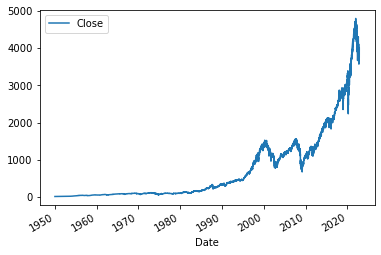

In [7]:
#We ask for the desired type of data 
flag = True
while(flag):
    typeData = input('Please, enter the desired type of data (Open, High, Low, Close, Volume, or Stock Splits)\n')
    if typeData == "Open" or typeData == "High" or typeData == "Low" or typeData == "Close" or typeData == "Volume" or typeData == "Stock Splits":
        flag = False
    else:
        print("please insert a valid type for data")
#plot the share
plotShare(ticker_share_price_data, typeData)